# Luca Corsetti 0001131095

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

%matplotlib inline

random_state = 777

np.random.seed(random_state)

Consider the file provided with the assignment, the task is to train and test two regression models, using y as target.
The solution must be produced as a Python Notebook, assuming that the dataset is in the same folder as the notebook.

The notebook must include appropriate comments and must operate as follows:
1. Load the data file and explore the data, showing size, data descriptions,
data distributions with boxplot, and correlation between columns 2pt
2. Comment the exploration of step 1 pointing out if there are predicting
columns having the absolute value of correlation with the target less
than 0.15 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 2pt
3. train test a multivariate linear regressor and show the Root Mean
Squared Error . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 2pt
4. train test a multivariate linear regressor on the reduced dataset obtained
dropping the columns loosely correlated with the target, and show the
Root Mean Squared Error . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .2pt
5. train and test on the reduced dataset a decision tree regressor, and show
the Root Mean Squared Error . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 2pt
6. optimise the depth of the decision tree regressor of step 5 searching for
the minimum Root Mean Squared Error with cross-validation, and show
the best RMSE . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 3pt
7. Comment the results . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 3pt

### 1. Load the data file and explore the data, showing size, data descriptions, data distributions with boxplot, and correlation between columns 2pt

In [5]:
df = pd.read_csv('./ml_python_labexam_2023_02_03.csv')

df.head()

X00       X01       X02       X03       X04       X05       X06  \
0 -0.016771 -0.026036 -0.001474  0.104545  0.352163  0.023372  0.003706   
1 -0.011618  0.025699 -0.026818  0.053014  0.613195 -0.012447  0.029382   
2  0.027478  0.009282 -0.020700  0.630085  0.612415 -0.004157  0.008240   
3 -0.003170 -0.001697 -0.028924  0.389900  0.000182  0.027526  0.012792   
4 -0.039508 -0.009104  0.021215  0.951426  0.778600  0.018246 -0.000294   

        X07       X08       X09         y  
0  0.004963 -0.007113  0.022166  3.288439  
1 -0.006348 -0.036920 -0.016464 -2.333510  
2  0.019062  0.010821 -0.012983  2.259783  
3 -0.021192 -0.011102  0.015352  2.939127  
4 -0.012900  0.004178  0.014846  1.623948

In [6]:
print(f"data size is {df.shape}")
df.describe()

data size is (1000, 11)


X00          X01          X02           X03           X04  \
count  1000.000000  1000.000000  1000.000000  1.000000e+03  1.000000e+03   
mean      0.000127     0.000297    -0.000421  3.378287e-01  2.521912e-01   
std       0.023475     0.018878     0.019124  2.952473e-01  2.877240e-01   
min      -0.074550    -0.055749    -0.063489  9.531015e-07  6.913766e-10   
25%      -0.015763    -0.012357    -0.013722  6.778294e-02  1.552023e-02   
50%       0.000446     0.000269    -0.000891  2.638645e-01  1.218160e-01   
75%       0.015529     0.013924     0.012571  5.712697e-01  4.295876e-01   
max       0.079599     0.073114     0.052593  9.996939e-01  9.988956e-01   

               X05          X06          X07          X08          X09  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.000364    -0.000191     0.000553     0.000130     0.000524   
std       0.017402     0.019349     0.017783     0.018999     0.025391   
min      -0.054694    -0.058531    -0.054578    -0.062925    -0.073059   
25%      -0.011251    -0.013393    -0.011797    -0.012001    -0.018202   
50%       0.000675    -0.000333     0.000422    -0.000858    -0.000219   
75%       0.012217     0.012797     0.012697     0.012722     0.018642   
max       0.053673     0.051803     0.049480     0.061867     0.081461   

                 y  
count  1000.000000  
mean      0.437747  
std       2.407762  
min      -6.609545  
25%      -1.200759  
50%       0.336424  
75%       2.175038  
max       7.915506

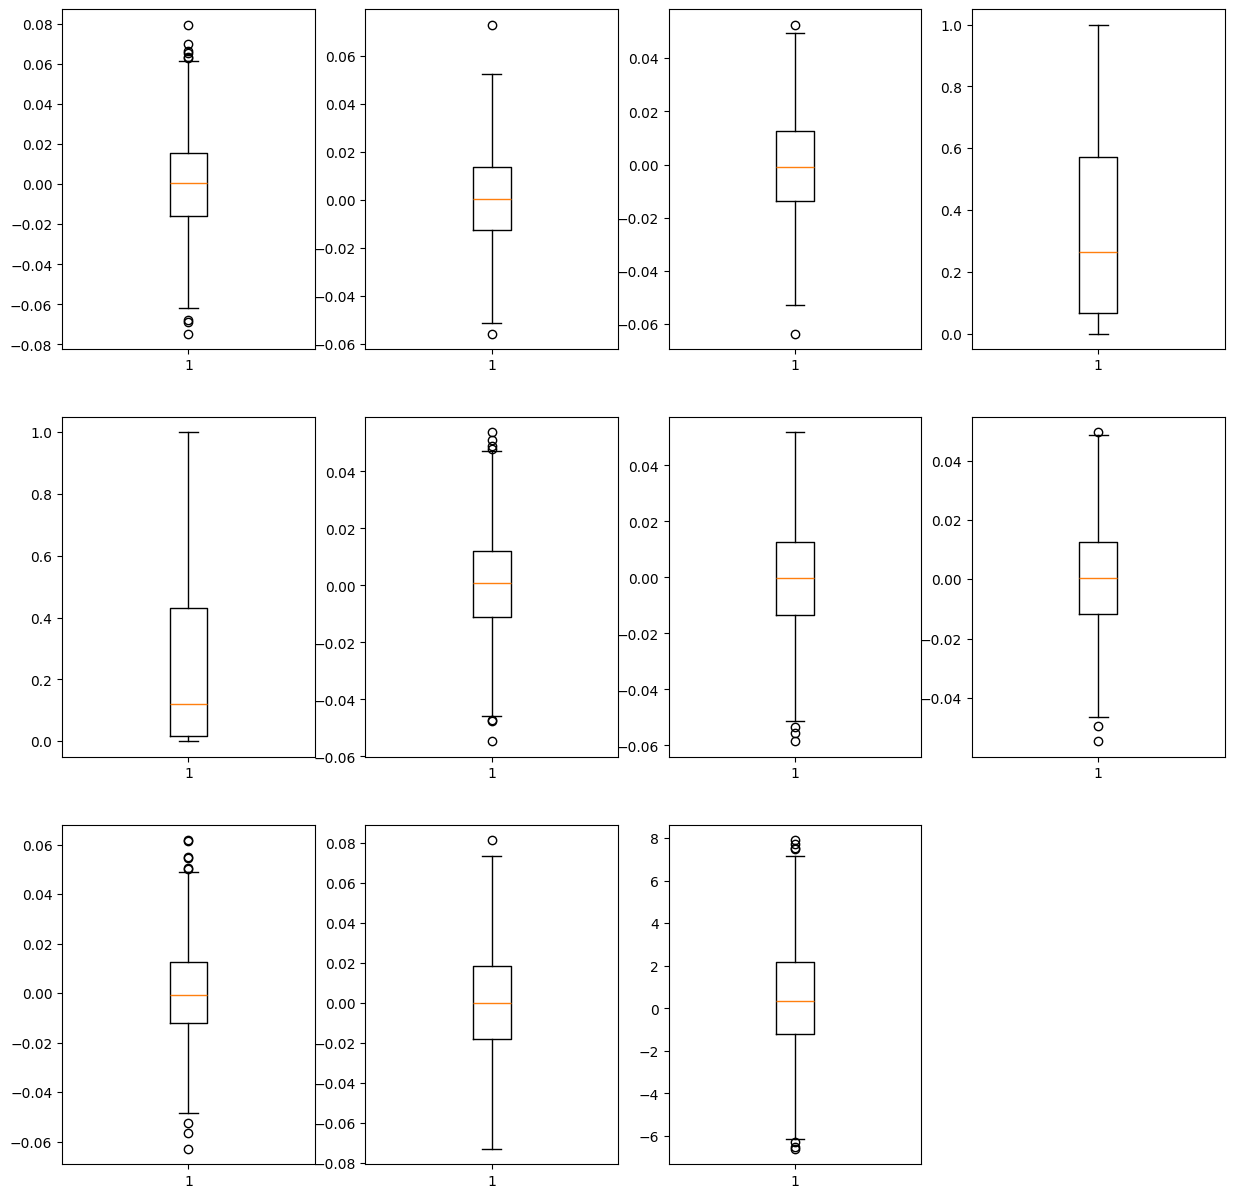

In [7]:
plt.figure(figsize=(15, 15))

pos = 1
for col in df.columns:
    plt.subplot(3, 4, pos)
    plt.boxplot(df[col], label=col)
    pos += 1

plt.show()

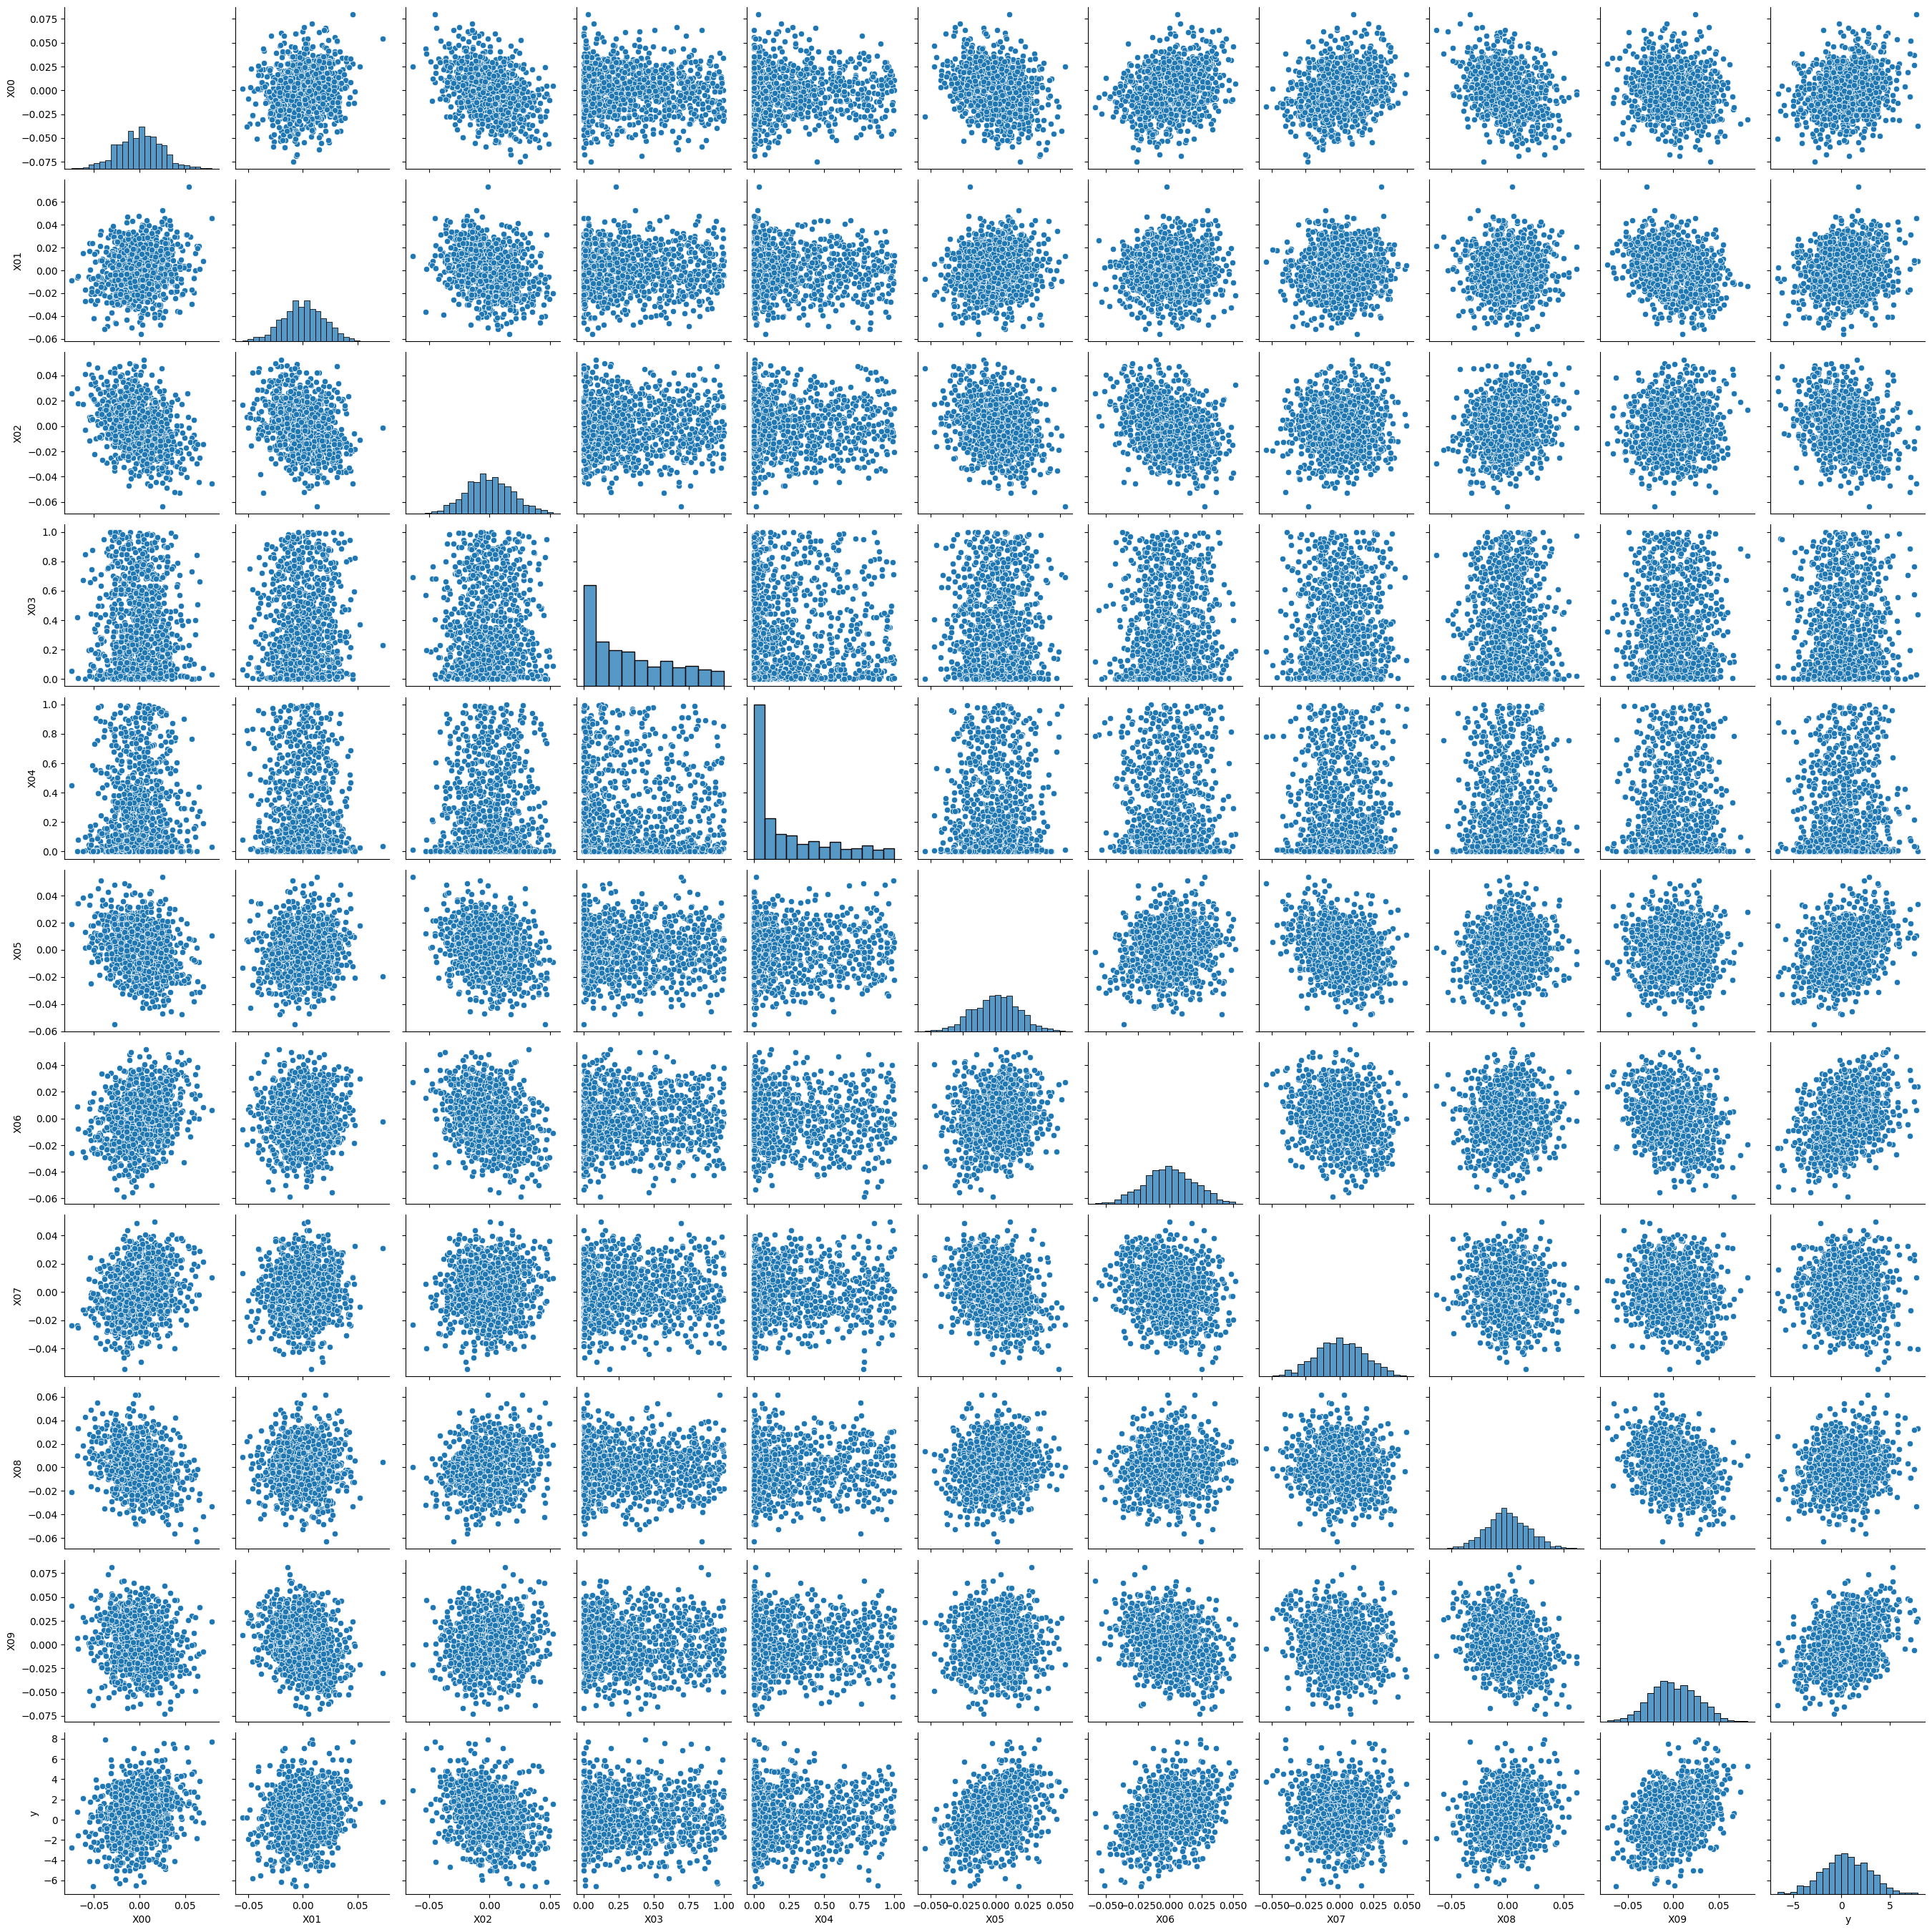

In [8]:
sns.pairplot(df)

**COMMENT:** by looking at the pairplot, we do not notice anything noticeable apart from the present outliers, which do not really differ in value from the majority of the points of the same group

In [9]:
df.corr()

X00       X01       X02       X03       X04       X05       X06  \
X00  1.000000  0.170854 -0.395194 -0.043222 -0.023247 -0.275844  0.280314   
X01  0.170854  1.000000 -0.308342  0.015840 -0.059226  0.102338  0.047167   
X02 -0.395194 -0.308342  1.000000  0.028499  0.036766 -0.266042 -0.326706   
X03 -0.043222  0.015840  0.028499  1.000000 -0.049209  0.008271  0.011157   
X04 -0.023247 -0.059226  0.036766 -0.049209  1.000000 -0.018662 -0.048011   
X05 -0.275844  0.102338 -0.266042  0.008271 -0.018662  1.000000  0.119608   
X06  0.280314  0.047167 -0.326706  0.011157 -0.048011  0.119608  1.000000   
X07  0.243400  0.086368  0.043103 -0.006028 -0.002504 -0.292621 -0.228867   
X08 -0.325324  0.009363  0.195065  0.029519 -0.006653  0.115454  0.054893   
X09 -0.153477 -0.268953  0.112824 -0.006292  0.042886  0.021566 -0.274311   
y    0.227594  0.170725 -0.287004 -0.005415  0.002213  0.369986  0.376340   

          X07       X08       X09         y  
X00  0.243400 -0.325324 -0.153477  0.227594  
X01  0.086368  0.009363 -0.268953  0.170725  
X02  0.043103  0.195065  0.112824 -0.287004  
X03 -0.006028  0.029519 -0.006292 -0.005415  
X04 -0.002504 -0.006653  0.042886  0.002213  
X05 -0.292621  0.115454  0.021566  0.369986  
X06 -0.228867  0.054893 -0.274311  0.376340  
X07  1.000000 -0.145627 -0.132451 -0.056175  
X08 -0.145627  1.000000 -0.316079  0.209655  
X09 -0.132451 -0.316079  1.000000  0.374650  
y   -0.056175  0.209655  0.374650  1.000000

**COMMENT:** no column has an high correlation with the other (we consider high to be > .90),

### 2. Comment the exploration of step 1 pointing out if there are predicting columns having the absolute value of correlation with the target less than 0.15

From the boxplots perspective, the data seems to be pretty similar to one another, the mean is located at the "same" value except for the columns "X03", "X04".\
The outliers are present in every column, even though their value does not seem to differ that much from the rest in their same category.\
By looking at the correlation, we do not see any value correlated with each other. In respect to the column 'y', we can see that the columns "X02", "X03", "X04" and "X07" have a correlation < 0.15

### 3. train test a multivariate linear regressor and show the Root Mean Squared Error

In [10]:
target = 'y'

y = df['y']
X = df.drop(columns=[target])
X.head()

X00       X01       X02       X03       X04       X05       X06  \
0 -0.016771 -0.026036 -0.001474  0.104545  0.352163  0.023372  0.003706   
1 -0.011618  0.025699 -0.026818  0.053014  0.613195 -0.012447  0.029382   
2  0.027478  0.009282 -0.020700  0.630085  0.612415 -0.004157  0.008240   
3 -0.003170 -0.001697 -0.028924  0.389900  0.000182  0.027526  0.012792   
4 -0.039508 -0.009104  0.021215  0.951426  0.778600  0.018246 -0.000294   

        X07       X08       X09  
0  0.004963 -0.007113  0.022166  
1 -0.006348 -0.036920 -0.016464  
2  0.019062  0.010821 -0.012983  
3 -0.021192 -0.011102  0.015352  
4 -0.012900  0.004178  0.014846

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)

print(f"there are {X_train.shape[0]} samples in the training set")
print(f"there are {X_test.shape[0]} samples in the test set")

there are 750 samples in the training set
there are 250 samples in the test set


In [57]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)

print(f"trained model with root mean squared error = {rmse}")

trained model with root mean squared error = 0.8486809641588525


### 4. train test a multivariate linear regressor on the reduced dataset obtained dropping the columns loosely correlated with the target, and show the Root Mean Squared Error

In [59]:
X_loosened = X.drop(columns=['X02', 'X03', 'X04', 'X07'])
X_loosened.head()

X00       X01       X05       X06       X08       X09
0 -0.016771 -0.026036  0.023372  0.003706 -0.007113  0.022166
1 -0.011618  0.025699 -0.012447  0.029382 -0.036920 -0.016464
2  0.027478  0.009282 -0.004157  0.008240  0.010821 -0.012983
3 -0.003170 -0.001697  0.027526  0.012792 -0.011102  0.015352
4 -0.039508 -0.009104  0.018246 -0.000294  0.004178  0.014846

In [60]:
X_train_loosened, X_test_loosened, y_train, y_test = train_test_split(X_loosened, y, random_state=random_state)

model_loosened = LinearRegression()

model_loosened.fit(X_train_loosened, y_train)

y_pred_loosened = model_loosened.predict(X_test_loosened)

rmse_loosened = mean_squared_error(y_test, y_pred_loosened)

print(f"trained model with root mean squared error = {rmse_loosened}")

trained model with root mean squared error = 1.0912825928251872


**COMMENT:** We did not improve our linear regression model

### 5. train and test on the reduced dataset a decision tree regressor, and show the Root Mean Squared Error

In [65]:
tree_model = DecisionTreeRegressor()

tree_model.fit(X_train_loosened, y_train)

y_pred_tree = tree_model.predict(X_test_loosened)

rmse_tree = mean_squared_error(y_test, y_pred_tree)

print(f"trained model with root mean squared error = {rmse_tree}")

trained model with root mean squared error = 4.023710937105018


### 6. optimise the depth of the decision tree regressor of step 5 searching for the minimum Root Mean Squared Error with cross-validation, and show the best RMSE

In [72]:
params = [{ 'max_depth': range(1, tree_model.tree_.max_depth+1) }]

cv = GridSearchCV(DecisionTreeRegressor(), param_grid=params, cv=5, scoring='neg_mean_squared_error')

cv.fit(X_train_loosened, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': range(1, 20)}],
             scoring='neg_mean_squared_error')

In [74]:
print(f"best estimator for tree regressor has params={cv.best_params_}")

best estimator for tree regressor has params={'max_depth': 7}


In [78]:
y_best_pred = cv.best_estimator_.predict(X_test_loosened)

rmse_best_tree = mean_squared_error(y_test, y_best_pred)

print(f"trained model with root mean squared error = {rmse_best_tree}")

trained model with root mean squared error = 3.6002254337326125


### 7. Comment the results

Not every rmse is acceptable given the fact that std of 'y' is ~2.407, therefore the tree regressors (both) are not to be considered.\
The best estimator seems to be the first one we trained, with a rmse of 0.8486809641588525.

Cleaning the dataset did not achieve a better result, but rather worsened the predictions of the models